In [8]:
import requests
import pandas as pd


response = requests.request("GET", "https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv")
print(response.status_code)
#print(response.content)
print(type(response))
#data = pd.read_csv(response.content)
#data.head()

200
<class 'requests.models.Response'>


In [11]:
import requests
import pandas as pd
from io import StringIO

# Make the API call and get the response
url = "https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    # Now, 'df' contains the data in a Pandas DataFrame
    print(df.head(100))  # Display the first few rows of the DataFrame
else:
    print("API request failed with status code:", response.status_code)



          Date  Value
0   2023-09-07  92.97
1   2023-09-06  92.30
2   2023-09-05  91.44
3   2023-09-04  91.27
4   2023-09-01  89.66
..         ...    ...
95  2023-04-27  78.40
96  2023-04-26  81.12
97  2023-04-25  82.95
98  2023-04-24  82.30
99  2023-04-21  81.86

[100 rows x 2 columns]


In [12]:
import requests
import pandas as pd
from io import StringIO

# Make the API call and get the response
url = "https://data.nasdaq.com/api/v3/datasets/OPEC/ORB.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    
    # Convert the 'Date' column to a datetime data type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Now, 'df' is a time series with 'Date' as the index
    print(df.head())  # Display the first few rows of the time series DataFrame
else:
    print("API request failed with status code:", response.status_code)


            Value
Date             
2023-09-07  92.97
2023-09-06  92.30
2023-09-05  91.44
2023-09-04  91.27
2023-09-01  89.66


https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv?collapse=none&start_date=2018-03-22&end_date=2018-03-27&api_key=tMexE-dhnFFSApsTQVgz


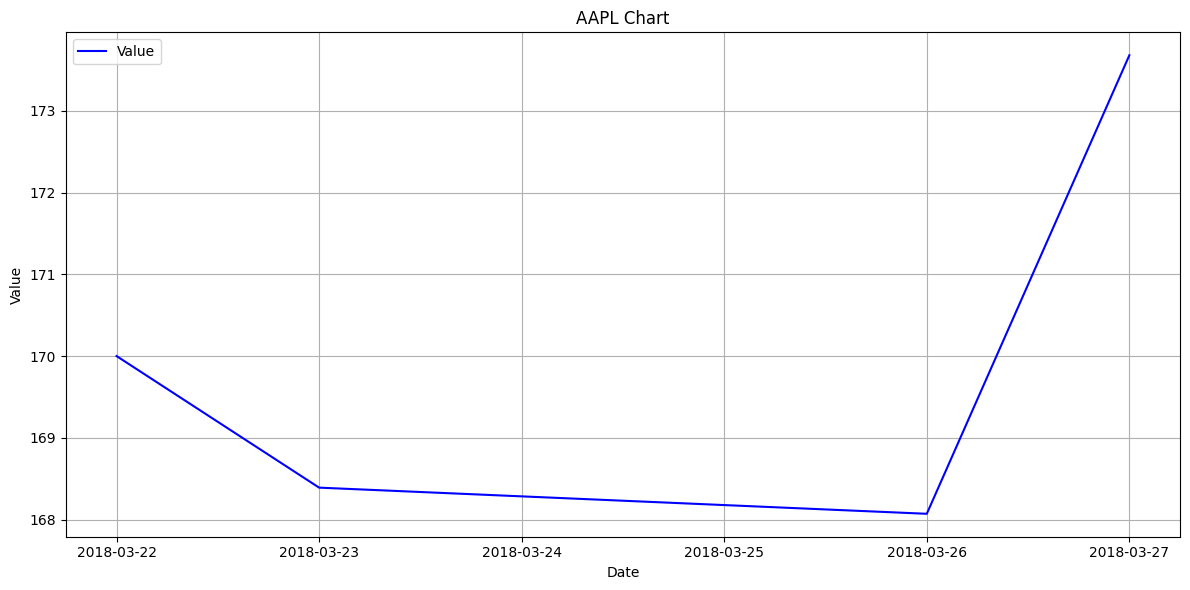

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime, timedelta

def get_date_range(time_range):
    end_date = datetime.strptime('2018-03-27', '%Y-%m-%d')
    start_date = None
    
    if time_range == '1d':
        start_date = end_date - timedelta(days=1)
    elif time_range == '5d':
        start_date = end_date - timedelta(days=5)
    elif time_range == '1m':
        start_date = end_date - timedelta(days=30)
    elif time_range == '1y':
        start_date = end_date - timedelta(days=365)
    else:
        return None, None  # Invalid time_range
    
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')


tickerName = input("Type a stock ticker symbol")
tickerName = tickerName.upper()
# Make the API call and get the response
#url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{tickerName}.csv"
time_range = input("Choose a time range ('1d', '5d', '1m', '1y'): ").strip()
start_date, end_date = get_date_range(time_range)
#url = "https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv?start_date=2023-07-10&end_date=2023-09-05"
url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{tickerName}.csv?collapse=none&start_date={start_date}&end_date={end_date}&api_key=tMexE-dhnFFSApsTQVgz"
print(url)

response = requests.get(url)

# Get user input for time range


# Check if the request was successful
if response.status_code == 200:
    # Use Pandas to read the CSV data from the response and create a DataFrame
    df = pd.read_csv(StringIO(response.text))
    
    # Convert the 'Date' column to a datetime data type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Create a time series line chart
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(df.index, df['Open'], linestyle='-', color='b', label='Value')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{tickerName} Chart')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # Display the chart
    plt.show()
else:
    print("API request failed with status code:", response.status_code)


In [6]:
from datetime import datetime, timedelta

def get_date_range(time_range):
    end_date = datetime.today()
    start_date = None
    
    if time_range == '1d':
        start_date = end_date - timedelta(days=1)
    elif time_range == '5d':
        start_date = end_date - timedelta(days=5)
    elif time_range == '1m':
        start_date = end_date - timedelta(days=30)
    elif time_range == '1y':
        start_date = end_date - timedelta(days=365)
    else:
        return None, None  # Invalid time_range
    
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')

# Get user input for time range
time_range = input("Choose a time range ('1d', '5d', '1m', '1y'): ").strip()

start_date, end_date = get_date_range(time_range)

if start_date and end_date:
    print(f"Start Date: {start_date}")
    print(f"End Date: {end_date}")
else:
    print("Invalid time range input.")


Start Date: 2023-08-10
End Date: 2023-09-09
